# SEN1721 Travel Behaviour Research

## `In-class assignment 1:`
## `Introduction to Latent classs models`

**Delft University of Technology**<br>
**Q3 2025**<br>
**Instructor:** Sander van Cranenburgh<br>
**TA:**  Gabriel Nova <br>

### `Instructions`

**In-class assignments aim to:**<br>
* Illustrate how models and theory discussed in the classroom work out in practice.
* Help you gather hands-on modelling and data analysis skills.

**In-class assignments are:**<br>
* Learning environments where you work with Python and get support from TA and fellow students.
* Not graded and do not have to be submitted.

### `Use of AI tools`
AI tools, such as ChatGPT and Copilot, are great tools to assist with programming. Moreover, in your later careers, you will work in a world where such tools are widely available. As such, we **encourage** you to use AI tools **effectively**. However, be careful not to overestimate the capacity of AI tools! AI tools cannot replace you: you still have to conceptualise the problem, dissect it and structure it to conduct proper analysis. We recommend being especially **reticent** with using AI tools for the more conceptual and reflection-oriented questions. <br>

**`Learning objectives In-class assignment 1`**

After completing the in-class assignment, you will be able to:
1. Discover choice data
1. Estimate RUM-based multinomial logit discrete choice models and interpret the results
1. Estimate Latent Class choice models and interpret the results

#### `Import packages`

To begin, we will import all the Python libraries that we will use in this assignment.

In [1]:
# Biogeme
import biogeme.database as db
import biogeme.biogeme as bio
from biogeme.expressions import Beta, Variable,PanelLikelihoodTrajectory

# Import custom estimation functions for Biogeme
from bio_estimation_fcns import estimate_mnl, estimate_LC, print_results

# General python packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from pathlib import Path
import seaborn as sns

# Random number generator
from random import random as rand
import random
random.seed(42)

# Pandas setting to show all columns when displaying a pandas dataframe
pd.set_option('display.max_columns', None)

### `1. Load and explore the data set` <br>

**`Load the data set`** <br>

In [2]:
# Create that path to the data file
data_path =  Path(f'data/Route_choice_data.csv')

# Load the data as a pandas dataframe
df = pd.read_csv(data_path, sep=',')

**Description of variables**<br>

The data contain 3,510 stated route choices from 388 respondent. Each alternative is defined by four attributes: TT, CONG, VAR, and TC.
Below is a description of the variables in the data set. For more information about the data, you can have a look at the original paper by [Chorus et al. (2012)](https://link.springer.com/article/10.1007/s11116-012-9444-3). 


| Variable | Description                                                       | Data type                 |
|----------|-------------------------------------------------------------------|---------------------------|
| Survey   | Identifier for the survey                                         | Integer                   |
| ID       | Unique identifier for each respondent                             | Integer                   |
| Quest    | Order of the choice tasks per respondent                          | Integer                   |
| CHOICE   | Chosen alternative                                                | Integer                   |
| TT1      | Travel Time for Alternative 1                                     | Integer                   |
| CONG1    | Percentage of travel time in congestion for Alternative 1         | Integer                   |
| VAR1     | Travel time variability for Alternative 1                         | Integer                   |
| TC1      | Travel Cost for Alternative 1                                     | Float                     |
| TT2      | Travel Time for Alternative 2                                     | Integer                   |
| CONG2    | Percentage of travel time in congestion for Alternative 2         | Integer                   |
| VAR2     | Travel time variability for Alternative 2                         | Integer                   |
| TC2      | Travel Cost for Alternative 2                                     | Float                     |
| TT3      | Travel Time for Alternative 3                                     | Integer                   |
| CONG3    | Percentage of travel time in congestion for Alternative 3         | Integer                   |
| VAR3     | Travel time variability for Alternative 3                         | Integer                   |
| TC3      | Travel Cost for Alternative 3                                     | Float                     |
| AV1      | Availability of Alternative 1 (0: not available, 1: available)    | Integer                   |
| AV2      | Availability of Alternative 2 (0: not available, 1: available)    | Integer                   |
| AV3      | Availability of Alternative 3 (0: not available, 1: available)    | Integer                   |
| age      | Age of the respondent                                             | Integer                   |
| edu      | Educational level                                                 | Integer                   |
| edufin   | Max education level                                               | Integer                   |
| sex      | Gender of the respondent (e.g., male, female)                     | Integer                   |
| E1       | I considered it difficult to make choices across the presented alternatives in this choice experiment | Integer                   |
| E2       | I considered it important to make the ‘right’ choice across the presented alternatives                | Integer                   |
| E3       | When considering a new job or residential location, having a pleasant commute takes a central place in my decision | Integer      |
| E4       | In general, I think making choices is difficult                                                       | Integer                   |
| E5       | When decisions are important I consider making choices difficult                                      | Integer                   |
| E6       | When making choices, I consider the possibility that I will regret my choice in hindsight             | Integer                   |
| E7       | When making choices, I prefer a choice set that is as large as possible                               | Integer                   |

To understand the data, it is helpful to carefully look at the choice tasks that were presented to the respondents. Below, you see a screenshot of one of the choice tasks.




![State choice preference](data/Picture1.png)

**`Explore the data set`**<br>

Now, let's explore the data set and examine the variables in the data.<br>
You can use `head()` to look at the first 5 rows of the data set.

In [3]:
# Show the first 5 rows of the dataframe
df.head()

,Survey,ID,Quest,CHOICE,TT1,CONG1,VAR1,TC1,TT2,CONG2,VAR2,TC2,TT3,CONG3,VAR3,TC3,AV1,AV2,AV3,age,edu,edufin,sex,E1,E2,E3,E4,E5,E6,E7
0,1,1337,1,2,45,10,5,12.5,60,25,15,9.0,75,40,25,5.5,1,1,1,53,4,4,2,4,4,5,3,3,2,2
1,1,1337,2,3,75,25,15,12.5,45,40,25,9.0,60,10,5,5.5,1,1,1,53,4,4,2,4,4,5,3,3,2,2
2,1,1337,3,3,60,40,25,12.5,75,10,5,9.0,45,25,15,5.5,1,1,1,53,4,4,2,4,4,5,3,3,2,2
3,1,1337,4,1,60,25,5,9.0,75,40,15,5.5,45,10,25,12.5,1,1,1,53,4,4,2,4,4,5,3,3,2,2
4,1,1337,5,2,45,40,15,9.0,60,10,25,5.5,75,25,5,12.5,1,1,1,53,4,4,2,4,4,5,3,3,2,2


**`Descriptive statistics`**<br>

We can use `describe()` to view descriptive statistics, such as count, mean, std, min, percentiles, and max about the **attribute levels** of the alternatives.

In [4]:
df.describe()

,Survey,ID,Quest,CHOICE,TT1,CONG1,VAR1,TC1,TT2,CONG2,VAR2,TC2,TT3,CONG3,VAR3,TC3,AV1,AV2,AV3,age,edu,edufin,sex,E1,E2,E3,E4,E5,E6,E7
count,3510.000000,3510.000000,3510.000000,3510.000000,3510.000000,3510.000000,3510.000000,3510.000000,3510.000000,3510.000000,3510.000000,3510.000000,3510.000000,3510.000000,3510.000000,3510.000000,3510.0,3510.0,3510.0,3510.000000,3510.000000,3510.000000,3510.000000,3510.000000,3510.000000,3510.000000,3510.000000,3510.000000,3510.000000,3510.000000
mean,1.505128,2008.402564,5.000000,1.941880,60.000000,25.000000,15.000000,9.000000,60.000000,25.000000,15.000000,9.000000,60.000000,25.000000,15.000000,9.000000,1.0,1.0,1.0,43.664103,4.923077,4.902564,1.428205,3.223077,3.766667,3.879487,2.456410,3.092308,2.784615,3.015385
std,0.500045,394.372955,2.582357,0.816638,12.249194,12.249194,8.166129,2.858145,12.249194,12.249194,8.166129,2.858145,12.249194,12.249194,8.166129,2.858145,0.0,0.0,0.0,11.246088,1.575427,4.941455,0.494889,1.071447,0.936256,0.999291,1.112743,1.079894,1.076600,1.062210
min,1.000000,1325.000000,1.000000,1.000000,45.000000,10.000000,5.000000,5.500000,45.000000,10.000000,5.000000,5.500000,45.000000,10.000000,5.000000,5.500000,1.0,1.0,1.0,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1679.000000,3.000000,1.000000,45.000000,10.000000,5.000000,5.500000,45.000000,10.000000,5.000000,5.500000,45.000000,10.000000,5.000000,5.500000,1.0,1.0,1.0,34.000000,4.000000,4.000000,1.000000,2.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000
50%,2.000000,2004.500000,5.000000,2.000000,60.000000,25.000000,15.000000,9.000000,60.000000,25.000000,15.000000,9.000000,60.000000,25.000000,15.000000,9.000000,1.0,1.0,1.0,43.500000,5.000000,5.000000,1.000000,3.000000,4.000000,4.000000,2.000000,3.000000,3.000000,3.000000
75%,2.000000,2327.000000,7.000000,3.000000,75.000000,40.000000,25.000000,12.500000,75.000000,40.000000,25.000000,12.500000,75.000000,40.000000,25.000000,12.500000,1.0,1.0,1.0,54.000000,6.000000,6.000000,2.000000,4.000000,4.000000,5.000000,3.000000,4.000000,4.000000,4.000000
max,2.000000,2705.000000,9.000000,3.000000,75.000000,40.000000,25.000000,12.500000,75.000000,40.000000,25.000000,12.500000,75.000000,40.000000,25.000000,12.500000,1.0,1.0,1.0,64.000000,7.000000,97.000000,2.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [5]:
df.isna().sum()

Survey    0
ID        0
Quest     0
CHOICE    0
TT1       0
CONG1     0
VAR1      0
TC1       0
TT2       0
CONG2     0
VAR2      0
TC2       0
TT3       0
CONG3     0
VAR3      0
TC3       0
AV1       0
AV2       0
AV3       0
age       0
edu       0
edufin    0
sex       0
E1        0
E2        0
E3        0
E4        0
E5        0
E6        0
E7        0
dtype: int64

**Interpretation**<br>

        --> As can be seen, the data look fine: it does not contain outliers of NaN values. 

In [6]:
# Check the number of choice task per individual
print(f"There are {df['ID'].nunique()} individuals in the dataset")
print(f"The number of choice tasks per individual is:")
print(df['ID'].value_counts().value_counts())

There are 388 individuals in the dataset
The number of choice tasks per individual is:
count
9     386
18      2
Name: count, dtype: int64


**Interpretation**<br>

        --> Almost all respondents have answered all 9 stated choice questions. However, for some reason, there are 2 respondents who have answered 18 questions. Perhaps, they participated in the two survey arms. Below, we remove these two respondents from the data set.

In [7]:
# Remove ID with > 9 choice tasks
df = df[df['ID'].map(df['ID'].value_counts()) <= 9]

# Check the number of choice task per individual
print(f"There are {df['ID'].nunique()} individuals in the dataset")
print(f"The number of choice tasks per individual is:")
print(df['ID'].value_counts().value_counts())

There are 386 individuals in the dataset
The number of choice tasks per individual is:
count
9    386
Name: count, dtype: int64


**`Correlations`**<br>

It is useful to check the correlation between the variables in your data set. We can use the `corr()` function to compute the correlation matrix, and show the correlation matrix using a heatmap.

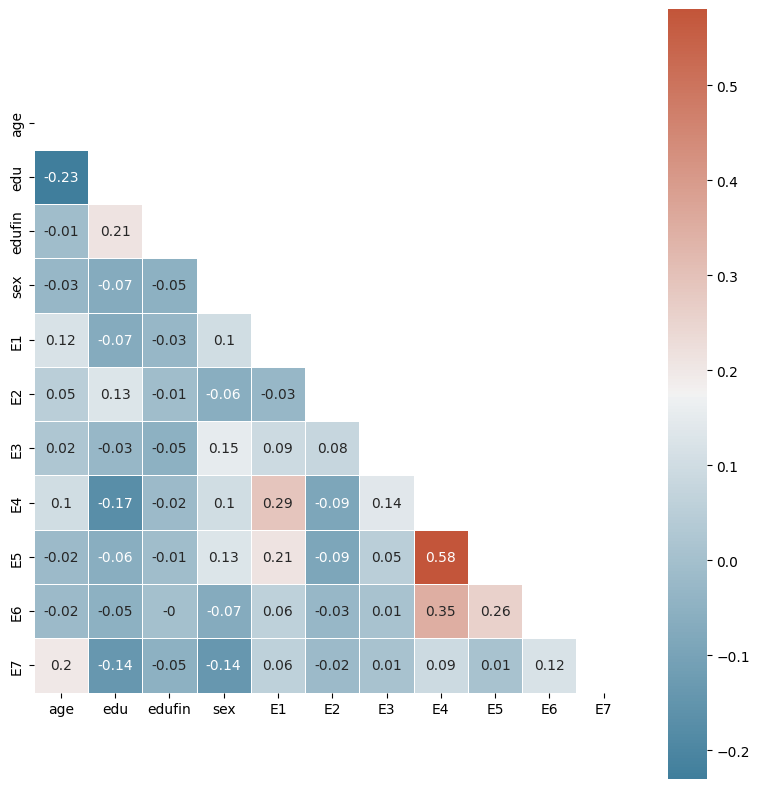

In [8]:
# heatmap of correlations
fig, axes = plt.subplots(figsize=(8, 8))
fig.set_tight_layout(True)

# Compute correlation matrix
corr = df[['age', 'edu', 'edufin', 'sex','E1','E2','E3','E4' ,'E5','E6','E7']].corr()

# Create upper triangular matrix to mask the upper triangular part of the heatmap
corr_mask = np.triu(np.ones_like(corr, dtype=bool))

# Generate a custom diverging colormap (because it looks better)
corr_cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Plot the heatmap
sns.heatmap(corr.round(2), mask=corr_mask, cmap=corr_cmap,
            annot=True, square=True, linewidths=.5, ax=axes)
plt.show()

**Interpretation**<br>

        --> As can be seen, the data look fine. The correlation matrix shows that none of the variables highly correlate. This is good because it means none of the variables are not redundant. The highest correllation is between E4 and E5.

**`Frequency and percentage of choices`**<br>

When modelling choices, we are also interested in the frequency at which alternatives are chosen. In experiments with **unlabelled** alternatives (like this one), this analysis tells us whether the choices are 'balanced'. This means that the alternatives have been chosen in a similar proportion. If the data are not balanced, it may indicate that the experimental design was insufficiently randomised. Alternatively, it may suggest that respondents not seriously answered the questions, as they only clicked the "right" or "left" alternative.

In [9]:
# Counts the number of times each  alternative is chosen
choice_freq = df['CHOICE'].value_counts()

# Calculate the percentage of the chosen alternatives
choice_percent = round(choice_freq / len(df['CHOICE']) * 100,2)

# Table Summary
choice_table = pd.DataFrame({'Choice': choice_freq.index, 'Frequency': choice_freq.values, 'Percentage':choice_percent.values} )

# Show the table
choice_table

,Choice,Frequency,Percentage
0,1,1266,36.44
1,2,1147,33.02
2,3,1061,30.54


**Interpretation**<br>

        --> As can be seen, all alternatives attain an (almost) equal share (although Alt 1 is somewhat overrepresented). This is what we would expect in a well-designed experiment.

### `2. Creating Biogeme database and variables` <br>
Now that we have developed a feeling for our data and prepocessed them, we can start with estimating discrete choice models. For this, we will use the Python package called `Biogeme`. The first thing we need to do is to create a Biogeme database. This database will contain all the variables that we will use in our model.

**`Biogeme database`**<br>
To use Biogeme for estimation, we first need to create the data set as a Biogeme database object using `db.Database()`. This object contains the data in a format compatible with the library functions for model estimation in Biogeme.

In [10]:
# db.Database takes two arguments:
# (1) a name (string) 
# (2) a data set (pandas dataframe)
biodata = db.Database('data', df)

**`Biogeme variables`**<br>
Additionally, we need to make the variables in our data set globally available so we can use them in the estimation.<br>

In [11]:
# Create biogeme variables
for c in biodata.data.columns:
    if biodata.data[c].dtypes != 'object': # This excludes the 'object' type columns
        globals()[c] = biodata.variables[c]

### `3. The linear-additive RUM-MNL model` <br>
In practice, choice modelling always starts with the estimation of simple models. The most common model to start with is the linear-additive RUM-MNL model. This assumes that the utility of each alternative is a linear function of the attributes of the alternatives. After having estimated this benchmark model, we can pursue more complex models, like Latent Class choice models.

**`The linear-additive utility specification`**

We start with defining the utility specification of the model that we wish to estimate.<br>

For that, we must define the parameters to be estimated and specify the utility functions.<br>

In the linear-additive RUM-MNL model, the observed utility is *V* for alternative *i* is given by:

$V_i = \beta_1 \cdot \text{x}_{1i} + \beta_2 \cdot \text{x}_{2i} + \ldots + \beta_M \cdot \text{x}_{Mi}  $

Where:
- $\beta_1, \beta_2, \ldots, \beta_M$ denote the marginal utility associated with each attribute $m$.
- $\text{x}_{1i}, \text{x}_{2i}, \ldots, \text{x}_{Mi} $ correspond to the attribute values alternative *i*.

The cell below creates this utility function in Biogeme.

In [12]:
# Give a name to the model    
model_name = 'Linear-additive RUM-MNL'

# Define the model parameters, using the function "Beta()", in which you must define:
# the name of the parameter (string),
# starting value (float), 
# lower bound (float),
# upper bound (float), 
# 0 or 1, indicating if the parameter must be estimated. 0 means estimated, 1 means fixed to the starting value. 
B_tt    = Beta('B_tt',  0, None, None, 0)
B_cong  = Beta('B_cong',0, None, None, 0)
B_var   = Beta('B_var', 0, None, None, 0)
B_tc    = Beta('B_tc',  0, None, None, 0)

# Define the utility functions
V1 = B_tt * TT1 + B_cong * CONG1 + B_var * VAR1 + B_tc * TC1
V2 = B_tt * TT2 + B_cong * CONG2 + B_var * VAR2 + B_tc * TC2
V3 = B_tt * TT3 + B_cong * CONG3 + B_var * VAR3 + B_tc * TC3

# Associate utility functions with the numbering of alternatives in the "choice" column
V = {1: V1, 2: V2, 3: V3}

# Create a dictionary called av to describe the availability conditions of each alternative, where 1 indicates that the alternative is available, and 0 indicates that the alternative is not available.
AV = {1: AV1, 2: AV2, 3: AV3} 

**`Estimation function`** 

Now that we have specified the model, we need to estimate it. To do so, we use the following function `estimate_mnl()` that we import from `bio_estimation_fcns.py`. Open the file from the working folder, and inspect the code. <br>
**Do you understand its structure?**.

This function takes the following inputs:
* V: a dictionary containing the utility functions for each alternative
* AV: a dictionary containing availability conditions
* CHOICE: an integer containing the choice variable
* database: database object
* model_name: name of the model

**`Estimation`**

We have created a biogeme database (biodata) and we have defined our utility functions. Therefore, we can now estimate the model by bringing these ingredients together. That is, we pass the model specifications and the database to the estimation function. The function `estimate_mnl()` returns an object which contains the estimation results.

In [13]:
# Estimate the model
results_MNL = estimate_mnl(V, AV, CHOICE, biodata,model_name)

File biogeme.toml has been created


**`Estimation results`**

Once we have estimated a mode, we want to see the estimation results. We can use the `print_results()` function to view the estimation statistics and the parameter estimates.

**It reports the following estimation statistics:**
* `Number of parameters`: Parameters being estimated.
* `Sample size`: The number of observations in the data set (used for estimating the model).
* `Excluded data`: The number of observations in the data set that were excluded for estimation.
* `Null log-likelihood`: The log-likelihood of the null model.
* `Final log-likelihood`: The log-likelihood of the estimated model.
* `Likelihood ratio test (null)`: A statistical test comparing the null model's likelihood with the likelihood of the estimated model. 
* `Rho square (null)`: Quantifies how well the model explains the data compared to the null model.
* `Rho bar square (null)`: Quantifies how well the model explains the data compared to the null model while penalising for the number of model parameters.
* `Akaike Information Criterion (AIC)`: A measure that shows the goodness of fit of the model, where lower AIC values indicate better models.
* `Bayesian Information Criterion (BIC)`: Similar to AIC, it penalizes model complexity more heavily, with lower values indicating better-fitting models while considering complexity.

**It reports the following information about the parameter estimates:**

* `Value`: This is the maximum likelihood estimate for the parameter
* `Rob. Std Err`: The (robust) standard error associated with the maximum likelihood estimate
* `Rob. t-test`: The t-value showing the significance, demonstrating the generalisability of the relationship to the population.
* `Rob. p-value`: The p-value associated with the t-value showing the significance, demonstrating the generalisability of the relationship to the population.


In [14]:
print_results(results_MNL)

Results for model Linear-additive RUM-MNL
Nbr of parameters:		4
Sample size:			3474
Excluded data:			0
Null log likelihood:		-3816.579
Final log likelihood:		-2590.77
Likelihood ratio test (null):		2451.618
Rho square (null):			0.321
Rho bar square (null):			0.32
Akaike Information Criterion:	5189.54
Bayesian Information Criterion:	5214.152

         Value  Rob. Std err  Rob. t-test  Rob. p-value
B_cong -0.0275        0.0016       -17.44           0.0
B_tc   -0.1730        0.0081       -21.45           0.0
B_tt   -0.0669        0.0019       -34.82           0.0
B_var  -0.0320        0.0027       -11.93           0.0


**Interpretation of the estimation results**

        --> The estimation results show that the model has a good fit to the data. The estimated parameters all have the intuitively estimated signs, and are all significant.

### `4. 2-class Latent class choice model` <br>

Now, we have estimated the benchmark linear-additive MNL models, we can proceed with estimating more complex models. Next, we will estimate a 2-class LC choice model. We assume the two classes have different preferences for the attributes of the alternatives, but the utility functions within each class are still linear-additive. 

**`Database for panel models`** 

First, we create a new biogeme database. This is needed because now we take into account the panel structure of the data. By creating a new copy we ensure that both MNL and LC models are estimated in the correct way.
Using the `.panel()` function, we can specify the panel structure of the data. In this case, we specify that the panel structure is defined by the `ID` variable.

In [15]:
biodata_panel = db.Database('data_panel', df) # Creates a biogeme database
biodata_panel.panel("ID")                     # Specify that the panel structure is defined by "ID"

**`Parameters and utility function definition`**

Next, we define the parameters and utility functions for the 2-class LC model. 

In [16]:
# Give a name to the model    
model_name = 'LC with 2 classes'

# Define the model parameters for class 0
B_tt_0    = Beta('B_tt_0',  0, None, None, 0)
B_cong_0  = Beta('B_cong_0',0, None, None, 0)
B_var_0   = Beta('B_var_0', 0, None, None, 0)
B_tc_0    = Beta('B_tc_0',  0, None, None, 0)

# Define the utility functions for class 1
B_tt_1    = Beta('B_tt_1',  0, None, None, 0)
B_cong_1  = Beta('B_cong_1',0, None, None, 0)
B_var_1   = Beta('B_var_1', 0, None, None, 0)
B_tc_1    = Beta('B_tc_1',  0, None, None, 0)

# Define the membership model parameters
delta_0 = Beta('delta_0',   0,    None, None, 1)
delta_1 = Beta('delta_1',   0.10, None, None, 0)

# Define the utility functions for class 0
V1_0 = B_tt_0 * TT1 + B_cong_0 * CONG1 + B_var_0 * VAR1 + B_tc_0 * TC1
V2_0 = B_tt_0 * TT2 + B_cong_0 * CONG2 + B_var_0 * VAR2 + B_tc_0 * TC2
V3_0 = B_tt_0 * TT3 + B_cong_0 * CONG3 + B_var_0 * VAR3 + B_tc_0 * TC3

# Define the utility functions for class 1
V1_1 = B_tt_1 * TT1 + B_cong_1 * CONG1 + B_var_1 * VAR1 + B_tc_1 * TC1
V2_1 = B_tt_1 * TT2 + B_cong_1 * CONG2 + B_var_1 * VAR2 + B_tc_1 * TC2
V3_1 = B_tt_1 * TT3 + B_cong_1 * CONG3 + B_var_1 * VAR3 + B_tc_1 * TC3

# Create a dictionary associating utility functions with the numbering of alternatives in the "choice" column
V_0 = {1: V1_0, 2: V2_0, 3: V3_0}
V_1 = {1: V1_1, 2: V2_1, 3: V3_1}

# Put the dictionaries of utility functions in a list
V = [V_0, V_1]

# Create a dictionary to describe the availability conditions of each alternative, where 1 indicates that the alternative is available, and 0 indicates that the alternative is not available.
AV = {1: AV1, 2: AV2, 3: AV3} 

# Define the membership model value functions for each class
nu_0 = delta_0  # Note: one class needs to be fixed to 0. delta_0 is fixed to 0
nu_1 = delta_1  # In this case, we only estimate a class membership constant delta_1

# Put membership functions in a list
nu = [nu_0, nu_1]

**`Estimation`**

We have created a biogeme pane; database (biodata_pane;) and we have defined our utility functions for the LC model. Therefore, we can now estimate the LC model by bringing these ingredients together. That is, we pass the model specifications and the database to the estimation function. The function `estimate_LC()` returns an object which contains the estimation results.

In [17]:
# Estimate the LC model
results_LC = estimate_LC(V,AV,nu,CHOICE, biodata_panel,model_name)

# Print the results
print_results(results_LC)

Results for model LC with 2 classes
Nbr of parameters:		9
Sample size:			386
Observations:			3474
Excluded data:			0
Null log likelihood:		-3816.579
Final log likelihood:		-2413.167
Likelihood ratio test (null):		2806.825
Rho square (null):			0.368
Rho bar square (null):			0.365
Akaike Information Criterion:	4844.333
Bayesian Information Criterion:	4879.936

           Value  Rob. Std err  Rob. t-test  Rob. p-value
B_cong_0 -0.0392        0.0029       -13.49          0.00
B_cong_1 -0.0083        0.0053        -1.55          0.12
B_tc_0   -0.2166        0.0138       -15.71          0.00
B_tc_1   -0.1288        0.0285        -4.51          0.00
B_tt_0   -0.0439        0.0034       -12.78          0.00
B_tt_1   -0.1692        0.0172        -9.83          0.00
B_var_0  -0.0263        0.0033        -7.91          0.00
B_var_1  -0.0812        0.0126        -6.44          0.00
delta_1  -0.7178        0.1676        -4.28          0.00


### `Exercise 1:  Interpretation of the LC model with 2 classes `<br>

`A.` Did the model fit (LL) improve as compared to the MNL model?<br>
`B.` Are the estimates all statistically significant?<br>
`C.` Carefully inspect the parameter estimates. What can you say about the differences in the tastes across the two classes?<br>
`D.` Which class is the largest? What does that mean? <br>
`E.` Calculate the "market shares" for each class using the estimated deltas. Hint, you can do this with a calculator, or using numpy. <br>

In [18]:
# 1)
# A. Yes, -2413.167 > -2590.77
# B. No, B_cong is not significant at 5% level in one of the classes because p-value > 0.05
# C. Class 0 is more sensitive to travel cost and congestion than class 1, and less sensitive to travel time and variance.
# D. Class 0 is largest because delta_1 < 0

In [19]:
# E
# Get the estimated values of the membership model
delta_1 = results_LC.get_beta_values()['delta_1']

# Calculate the value functions for each class
nu_0 = 0
nu_1 = delta_1

# Calculate the probability of belonging to each class
P_class0  = np.exp(nu_0)/(np.exp(nu_0)+np.exp(nu_1))
P_class1  = np.exp(nu_1)/(np.exp(nu_0)+np.exp(nu_1))

# Print the results
print(f"P_class 0: {P_class0:0.2f}")
print(f"P_class 1: {P_class1:0.2f}")

P_class 0: 0.67
P_class 1: 0.33


### `Exercise 2:  Estimate an LC model with 3 classes `<br>
To do so, you need to:
* Create a new cell and copy the code from the 2-class LC model
* Extend the code to three classes
* Estimate the model
* Print the results

`A.` Did the model fit (LL) improve as compared to the 2-class model? <br>
`B.` One of the class constants (deltas) is probably insignificant. What does this tell us? <br>

In [20]:
# 2)
# A. Yes, the model fit improved considerable from -2413.167 to -2362.453

# Give a name to the model    
model_name = 'LC with 3 classes'

# Define the model parameters for class 0
B_tt_0    = Beta('B_tt_0',  0, None, None, 0)
B_cong_0  = Beta('B_cong_0',0, None, None, 0)
B_var_0   = Beta('B_var_0', 0, None, None, 0)
B_tc_0    = Beta('B_tc_0',  0, None, None, 0)

# Define the model parameters for class 1
B_tt_1    = Beta('B_tt_1',  0, None, None, 0)
B_cong_1  = Beta('B_cong_1',0, None, None, 0)
B_var_1   = Beta('B_var_1', 0, None, None, 0)
B_tc_1    = Beta('B_tc_1',  0, None, None, 0)

# Define the model parameters for class 2
B_tt_2    = Beta('B_tt_2',  0, None, None, 0)
B_cong_2  = Beta('B_cong_2',0, None, None, 0)
B_var_2   = Beta('B_var_2', 0, None, None, 0)
B_tc_2    = Beta('B_tc_2',  0, None, None, 0)

# Define the membership model parameters
delta_0  = Beta('delta_0', 0   , None, None, 1)
delta_1  = Beta('delta_1', 0.10, None, None, 0)
delta_2  = Beta('delta_2',-0.10, None, None, 0)

# Define the utility functions for class 0
V1_0 = B_tt_0 * TT1 + B_cong_0 * CONG1 + B_var_0 * VAR1 + B_tc_0 * TC1
V2_0 = B_tt_0 * TT2 + B_cong_0 * CONG2 + B_var_0 * VAR2 + B_tc_0 * TC2
V3_0 = B_tt_0 * TT3 + B_cong_0 * CONG3 + B_var_0 * VAR3 + B_tc_0 * TC3

# Define the utility functions for class 1
V1_1 = B_tt_1 * TT1 + B_cong_1 * CONG1 + B_var_1 * VAR1 + B_tc_1 * TC1
V2_1 = B_tt_1 * TT2 + B_cong_1 * CONG2 + B_var_1 * VAR2 + B_tc_1 * TC2
V3_1 = B_tt_1 * TT3 + B_cong_1 * CONG3 + B_var_1 * VAR3 + B_tc_1 * TC3

# Define the utility functions for class 2
V1_2 = B_tt_2 * TT1 + B_cong_2 * CONG1 + B_var_2 * VAR1 + B_tc_2 * TC1
V2_2 = B_tt_2 * TT2 + B_cong_2 * CONG2 + B_var_2 * VAR2 + B_tc_2 * TC2
V3_2 = B_tt_2 * TT3 + B_cong_2 * CONG3 + B_var_2 * VAR3 + B_tc_2 * TC3

# Associate utility functions with the numbering of alternatives in the "choice" column
V_0 = {1: V1_0, 2: V2_0, 3: V3_0}
V_1 = {1: V1_1, 2: V2_1, 3: V3_1}
V_2 = {1: V1_2, 2: V2_2, 3: V3_2}

# Put the dictionary of utility functions in a list
V = [V_0, V_1, V_2]

# Create a dictionary called av to describe the availability conditions of each alternative, where 1 indicates that the alternative is available, and 0 indicates that the alternative is not available.
AV = {1: AV1, 2: AV2, 3: AV3} 

# Define the membership model value functions
nu_0 = 0
nu_1 = delta_1
nu_2 = delta_2

# Put membership functions in a list
nu = [nu_0, nu_1, nu_2]

# Estimate the LC model
results = estimate_LC(V,AV,nu,CHOICE, biodata_panel,model_name)

# Print the results
print_results(results)

Results for model LC with 3 classes
Nbr of parameters:		14
Sample size:			386
Observations:			3474
Excluded data:			0
Null log likelihood:		-3816.579
Final log likelihood:		-2362.453
Likelihood ratio test (null):		2908.252
Rho square (null):			0.381
Rho bar square (null):			0.377
Akaike Information Criterion:	4752.906
Bayesian Information Criterion:	4808.288

           Value  Rob. Std err  Rob. t-test  Rob. p-value
B_cong_0 -0.0428        0.0047        -9.08          0.00
B_cong_1 -0.0087        0.0051        -1.69          0.09
B_cong_2 -0.0376        0.0068        -5.56          0.00
B_tc_0   -0.3574        0.0330       -10.82          0.00
B_tc_1   -0.1161        0.0259        -4.48          0.00
B_tc_2   -0.0732        0.0209        -3.51          0.00
B_tt_0   -0.0729        0.0062       -11.71          0.00
B_tt_1   -0.1618        0.0155       -10.43          0.00
B_tt_2   -0.0106        0.0063        -1.69          0.09
B_var_0  -0.0247        0.0046        -5.35          0.00


In [21]:
# 2)
# B. Indeed delta_1 is insignificant at 5% level. 
# This tells us that in the population class 1 not smaller (or larger) than class 0.